<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Machine Learning</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Machine Learning</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

## 📙 Importing Libraries

In [2]:
import pandas as pd 

from showupforhealth.params import *
from showupforhealth.utils import *
from showupforhealth.interface import *
from showupforhealth.ml_functions.preprocessor import *

# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2


In [3]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()
print(data.shape)

(717792, 38)


In [5]:
data['Sex'].value_counts(normalize=True)

0.0    0.6388
1.0    0.3612
Name: Sex, dtype: float64

# 🚧 Random Undersample 

In [8]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
df_minority = data[data.Appointment_status==0]
df_majority = data[data.Appointment_status==1]

In [9]:
df_majority.shape

(867132, 37)

In [18]:
# Undersample majority class
df_majority_under = resample(df_majority, 
                           replace=False,    
                           n_samples=(len(df_minority)*3),
                           random_state=123)  

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_under, df_minority])

print(df_undersampled.Appointment_status.value_counts(normalize=True))

1    0.75
0    0.25
Name: Appointment_status, dtype: float64


## 🔀 Shaffe the dataframe

In [19]:
import pandas as pd
from sklearn.utils import shuffle

# Shuffle dataframe 
df = shuffle(df_undersampled)

# Reset index
df = df.reset_index(drop=True)

df.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,6.7,0.0,52,2,0.00,0,0,0,0,0,0,0,21556.0,0.861260,0.614909,0.0,0,28.0,8.854560e-01,0.464723,0.258819,-0.965926,1.000000e+00,6.123234e-17,0.974928,-0.222521,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,17.7,0.0,35,2,0.14,1,1,0,0,0,0,1,8243.0,0.323950,2.044076,11.0,0,23.0,-3.216245e-16,-1.000000,-0.707107,-0.707107,1.224647e-16,-1.000000e+00,-0.433884,-0.900969,42.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,7.4,0.1,30,0,0.06,0,1,0,0,0,0,0,12092.0,0.588403,4.166642,0.0,0,19.0,8.854560e-01,0.464723,-0.707107,-0.707107,8.660254e-01,5.000000e-01,0.781831,0.623490,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,7.3,0.0,30,0,0.00,0,0,0,0,0,0,0,18886.0,0.602884,1.251910,0.0,0,15.0,9.927089e-01,-0.120537,0.707107,-0.707107,8.660254e-01,-5.000000e-01,0.781831,0.623490,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,5.3,0.1,64,0,0.06,0,0,0,0,1,0,0,8243.0,0.366451,0.581824,12.0,0,43.0,7.485107e-01,0.663123,-0.866025,-0.500000,8.660254e-01,5.000000e-01,0.000000,1.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.shape

(137536, 37)

## Define X & y

In [5]:
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (717792, 36)
y - dependant variable - Appointment_status: (717792,)


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create TSNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X) 

# Plot the transformed data
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)
plt.colorbar()
plt.title('t-SNE plot')
plt.show()

KeyboardInterrupt: 

## ✂️ Train Test Split

In [22]:
X_train, X_test, y_train, y_test = perform_train_test_split(X, y)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (110028, 36), (110028,)
 Test Set:  X_test, y_test - - (27508, 36), (27508,)


## 🔁 Oversampling SMOTE

In [6]:
# X_train_os, y_train_os = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(763185, 36) y_train_os :(763185,)


# ⚖️ Scale the Data

In [24]:
scaler_instance = fit_scaler(X_train, 'minmax')

In [25]:
X_train_scaled = transform_data(X_train, scaler_instance=scaler_instance)
X_test_scaled = transform_data(X_test, scaler_instance=scaler_instance)

In [26]:
X_train_scaled.head()

,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,0.564593,0.000000,0.839623,0.000000,0.413333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.561664,0.180922,0.035838,0.011765,0.0,0.224490,0.677302,0.032492,0.500000,0.000000,0.50,0.000000,0.722521,5.551115e-17,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.476077,0.000000,0.594340,0.666667,0.106667,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.215166,0.061260,0.053949,0.058824,0.0,0.346939,0.874255,0.168439,0.853553,0.156961,0.75,0.066987,0.277479,0.000000e+00,0.007937,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.492823,0.010204,0.198113,0.000000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253749,0.115784,0.026527,0.005882,0.0,0.020408,0.732362,0.057272,0.500000,0.000000,0.50,0.000000,1.000000,3.568959e-01,0.214286,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.251196,0.000000,0.443396,0.000000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235239,0.079307,0.067319,0.000000,0.0,0.129252,0.996354,0.560268,0.750000,0.071797,1.00,0.500000,0.900969,8.019377e-01,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.234450,0.000000,0.594340,0.000000,0.226667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.581476,0.112090,0.022148,0.005882,0.0,0.122449,0.942728,0.732362,0.853553,0.156961,1.00,0.500000,0.277479,0.000000e+00,0.047619,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.decomposition import FastICA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

In [28]:
pl = Pipeline(steps=[('fastica', FastICA(random_state=42, tol=0.6500000000000001)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.6500000000000001,
                                      min_samples_leaf=11, min_samples_split=9,
                                      random_state=42))])

In [29]:
pl

Pipeline(steps=[('fastica', FastICA(random_state=42, tol=0.6500000000000001)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.6500000000000001,
                                      min_samples_leaf=11, min_samples_split=9,
                                      random_state=42))])

In [ ]:
evaluate_classification_model(pl, X_train_scaled, y_train)

Pipeline(steps=[('fastica', FastICA(random_state=42, tol=0.6500000000000001)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.6500000000000001,
                                      min_samples_leaf=11, min_samples_split=9,
                                      random_state=42))])


/Users/janduplessis/.pyenv/versions/3.10.6/envs/showupforhealth/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/janduplessis/.pyenv/versions/3.10.6/envs/showupforhealth/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/janduplessis/.pyenv/versions/3.10.6/envs/showupforhealth/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/janduplessis/.pyenv/versions/3.10.6/envs/showupforhealth/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/janduplessis/.pyenv/versions/3.10.6/envs/showupforhealth/lib/python3.10/s

,Mean,Standard Deviation
fit_time,23.984979,1.180304
score_time,0.326061,0.009705
test_accuracy,0.842740,0.002353
test_precision,0.802639,0.002257
test_recall,0.753947,0.007091
test_f1_score,0.772765,0.005526


In [ ]:
seabor 

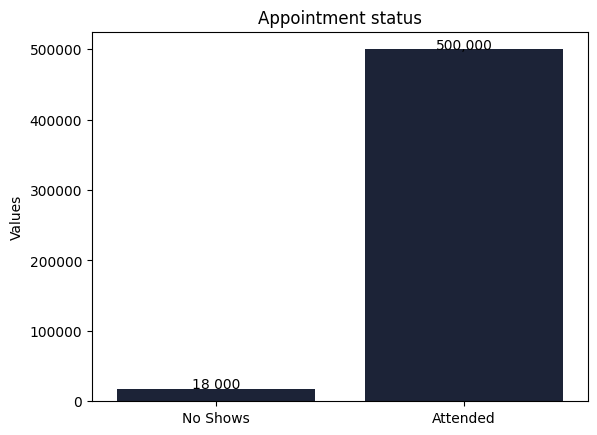

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your data, adjusted to maintain the proportion
categories = ['No Shows', 'Attended']
values = [18000, 500000]

# Create the barplot
sns.barplot(x=categories, y=values, color='#17213b')

# Adding labels
plt.ylabel('Values')
plt.title('Appointment status')

# Annotating the bars with the real values
plt.text(0, 18000, '18 000', ha='center')
plt.text(1, 500000, '500,000', ha='center')

plt.show()